### Import modules

In [52]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import preprocessing
from sklearn.utils.multiclass import unique_labels
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import yaml
import my_py_tools
from werkzeug.utils import secure_filename # https://blog.csdn.net/weixin_44493841/article/details/107864437
plt.style.use('seaborn')

### Read config

In [170]:
# Read configures
from my_py_tools.yaml.yaml import YAML
CONFIG_PATH = "config.yaml"
config = YAML(CONFIG_PATH).get_data()
print(config)

{'path': {'data': {'all_images': 'data/images', 'rating_record': 'data/all_records.csv'}, 'statistics': 'statistics'}, 'attributes': ['hp'], 'input': {'input_size': {'width': 3, 'height': 3}, 'color': 'RGB'}, 'train': {'batch_size': 100, 'epoch': 1, 'K_fold_number': 5, 'random_crop': {'use_random_crop': 'false', 'min_size': {'width': 178, 'height': 218}}}, 'confusion_matrix': {'normalize': 'true', 'round_precision': 2}}


### Load rating recorrd

In [4]:
# Load rating record
df_record = pd.read_csv(config['path']['data']['rating_record'])

# Make each attribute's dataframe (name, image, attribute)
attrs = ['hp', 'pa', 'ma', 'sp', 'cr']
df_attrs = {}
print("Show all dataframes' head 1:")
for attr in attrs:
    df_attrs[attr] = df_record.filter(['name', 'image', attr], axis=1)
    print(df_attrs[attr].head(1))


Show all dataframes' head 1:
   name                image  hp
0  shih  nba_players_290.png  10
   name                image  pa
0  shih  nba_players_290.png   7
   name                image  ma
0  shih  nba_players_290.png   3
   name                image  sp
0  shih  nba_players_290.png   9
   name                image  cr
0  shih  nba_players_290.png   8


### Observe the data

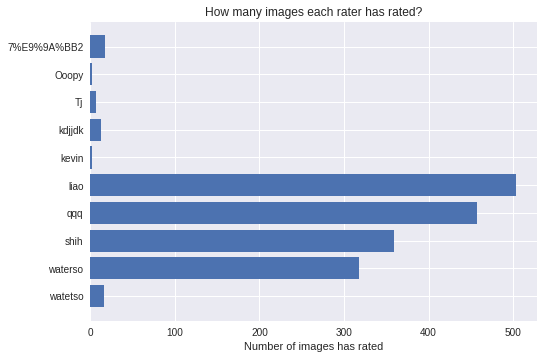

In [5]:
# Plot how many images each rater has rated
from my_py_tools.plt.barh import plot_horizontal_bar
rater_to_num = df_record.groupby('name').size()
plot_horizontal_bar(rater_to_num.values,
                    rater_to_num.index.values,
                    x_label='Number of images has rated',
                    title='How many images each rater has rated?',
                    show=False
                    )

Valid range: 0~10
Attribute hp: min=0, max=10 => VALID
Attribute pa: min=0, max=10 => VALID
Attribute ma: min=0, max=10 => VALID
Attribute sp: min=0, max=10 => VALID
Attribute cr: min=0, max=10 => VALID


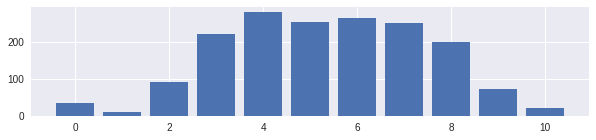

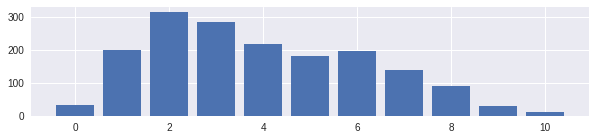

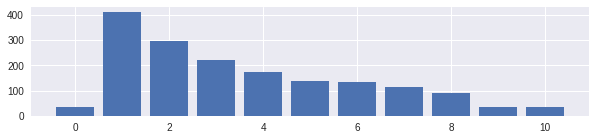

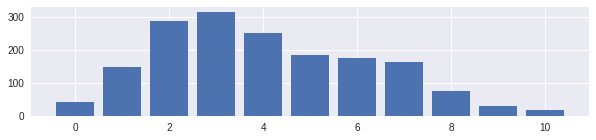

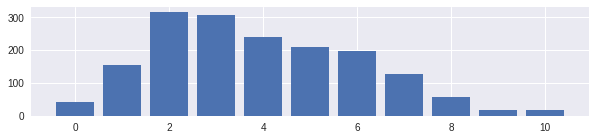

In [6]:
# See if there's anything outside the distribution range (0~10)
from my_py_tools.numpy.frequencies import get_frequencies
print("Valid range: 0~10")
for attr in attrs:
    frequencies, unique, counts = get_frequencies(data=df_record[attr].values, return_unique_and_counts=True)
    min_uniq, max_uniq = min(unique.tolist()), max(unique.tolist())
    print("Attribute {}: min={}, max={} => {}".format(attr, min_uniq, max_uniq,
                                                      "VALID" if min_uniq >= 0 and max_uniq <= 10 else "INVALID"))
    plt.figure(figsize=(10,2))
    plt.bar([x[0] for x in frequencies], [x[1] for x in frequencies])
    plt.show()

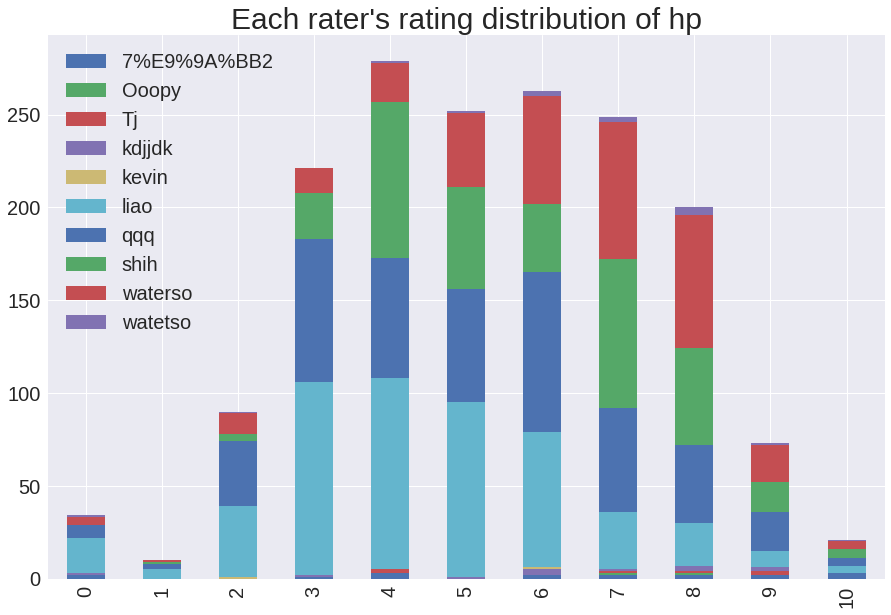

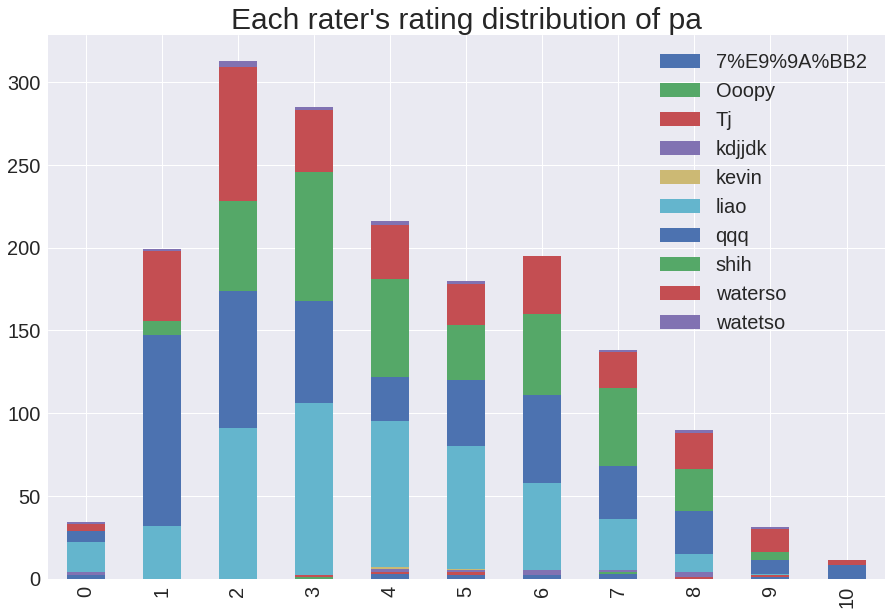

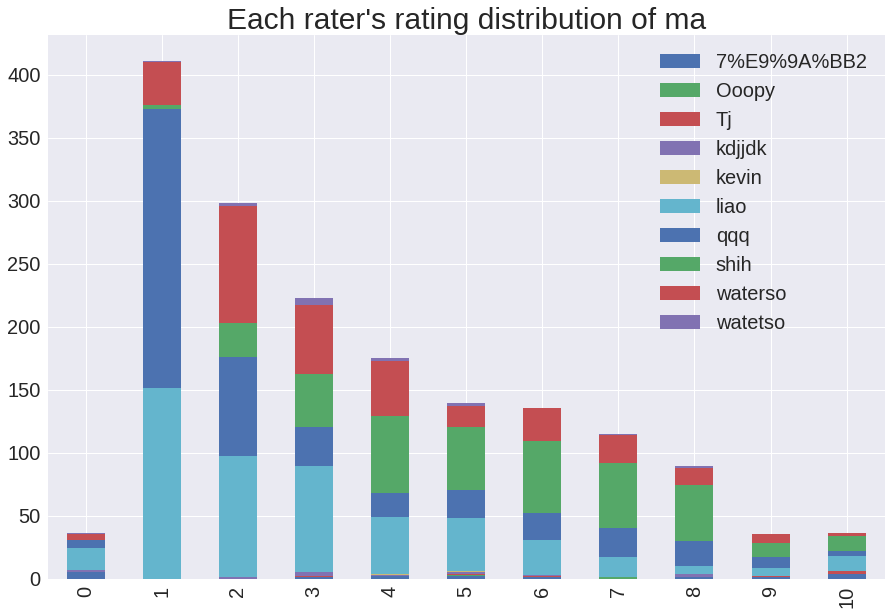

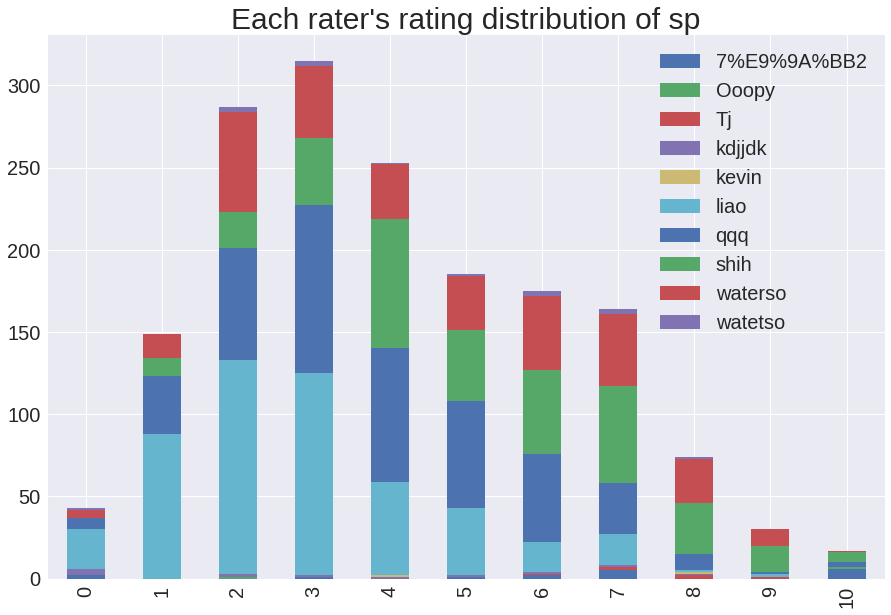

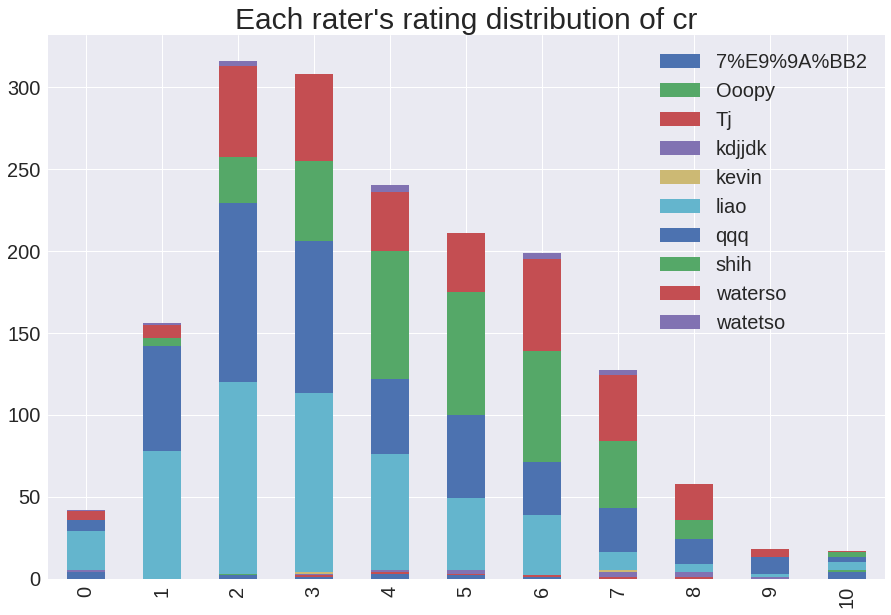

In [7]:
# Plot each rater's rating distribution of each attribute
for attr in attrs:
    # Group and collect as lists
    # https://stackoverflow.com/questions/22219004/how-to-group-dataframe-rows-into-list-in-pandas-groupby
    rater_to_attrSet = df_attrs[attr].groupby(['name'])[attr].apply(list)
    rater_num = len(rater_to_attrSet) # Number of raters
    rater_hp_distributions = {}
    for i in range(rater_num):
        (unique_nums, counts) = np.unique(np.array(rater_to_attrSet.values[i]), return_counts=True)
        unique_nums, counts = unique_nums.tolist(), counts.tolist()
        frequencies = {unique_nums[i]: counts[i] for i in range(len(unique_nums))}
        distribution = []
        for j in range(0, 11): # 0~10
                distribution.append(0) if j not in frequencies else distribution.append(frequencies[j])
        rater_hp_distributions[rater_to_attrSet.index[i]] = distribution
    df = pd.DataFrame(data=rater_hp_distributions)
    ax = df.plot.bar(stacked=True, figsize=(15,10), fontsize=20)
    ax.legend(prop={'size': 20}) # Set legend size
    title = "Each rater's rating distribution of {}".format(attr)
    ax.set_title(label=title, fontdict={'fontsize': 30}) # Set title
    plt.savefig(os.path.join(config['path']['statistics'],secure_filename(title)))

Frist try: all pixels are independent features
compress to 178(h) * 278(w)
#TODO:
- Try one attribute; after fininshing try others
- Think how to define invalid data and how to use them
- Split into train and validation set
- Try use all img and try use all images of a specific rater
- Try small group, like nba_players, professors......
- Design hyper-params
- Extra: other models, eg. KNN, decision tree
- Better if turned into gray-scale images?

### Try liao's rating in attr "hp"

=== Attribute hp ===

****** 387 100
 ^^^^^^ Fold-1 ^^^^^^ 

Epochs: 1
Batch size: 100
Total iterations: 4
Input size(w,h): (3,3)

Epoch 1
+++++ iteration 1
+++++ iteration 2
+++++ iteration 3
+++++ iteration 4
+++++ Epoch accuracy score: 0.17525773195876287
This fold's accuracy score: 0.17525773195876287

****** 387 100
 ^^^^^^ Fold-2 ^^^^^^ 

Epochs: 1
Batch size: 100
Total iterations: 4
Input size(w,h): (3,3)

Epoch 1
+++++ iteration 1
+++++ iteration 2
+++++ iteration 3
+++++ iteration 4
+++++ Epoch accuracy score: 0.1958762886597938
This fold's accuracy score: 0.1958762886597938

****** 387 100
 ^^^^^^ Fold-3 ^^^^^^ 

Epochs: 1
Batch size: 100
Total iterations: 4
Input size(w,h): (3,3)

Epoch 1
+++++ iteration 1
+++++ iteration 2
+++++ iteration 3
+++++ iteration 4
+++++ Epoch accuracy score: 0.16494845360824742
This fold's accuracy score: 0.16494845360824742

****** 387 100
 ^^^^^^ Fold-4 ^^^^^^ 

Epochs: 1
Batch size: 100
Total iterations: 4
Input size(w,h): (3,3)

Epoch 1
+++++

/home/smallfish/repo/my_py_tools/venv/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/smallfish/repo/my_py_tools/venv/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/smallfish/repo/my_py_tools/venv/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/smallfish/repo/my_py_tools/venv/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/smallfish/repo/my_py_tools/venv/lib/python3.8/site-packages/PIL/Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.w

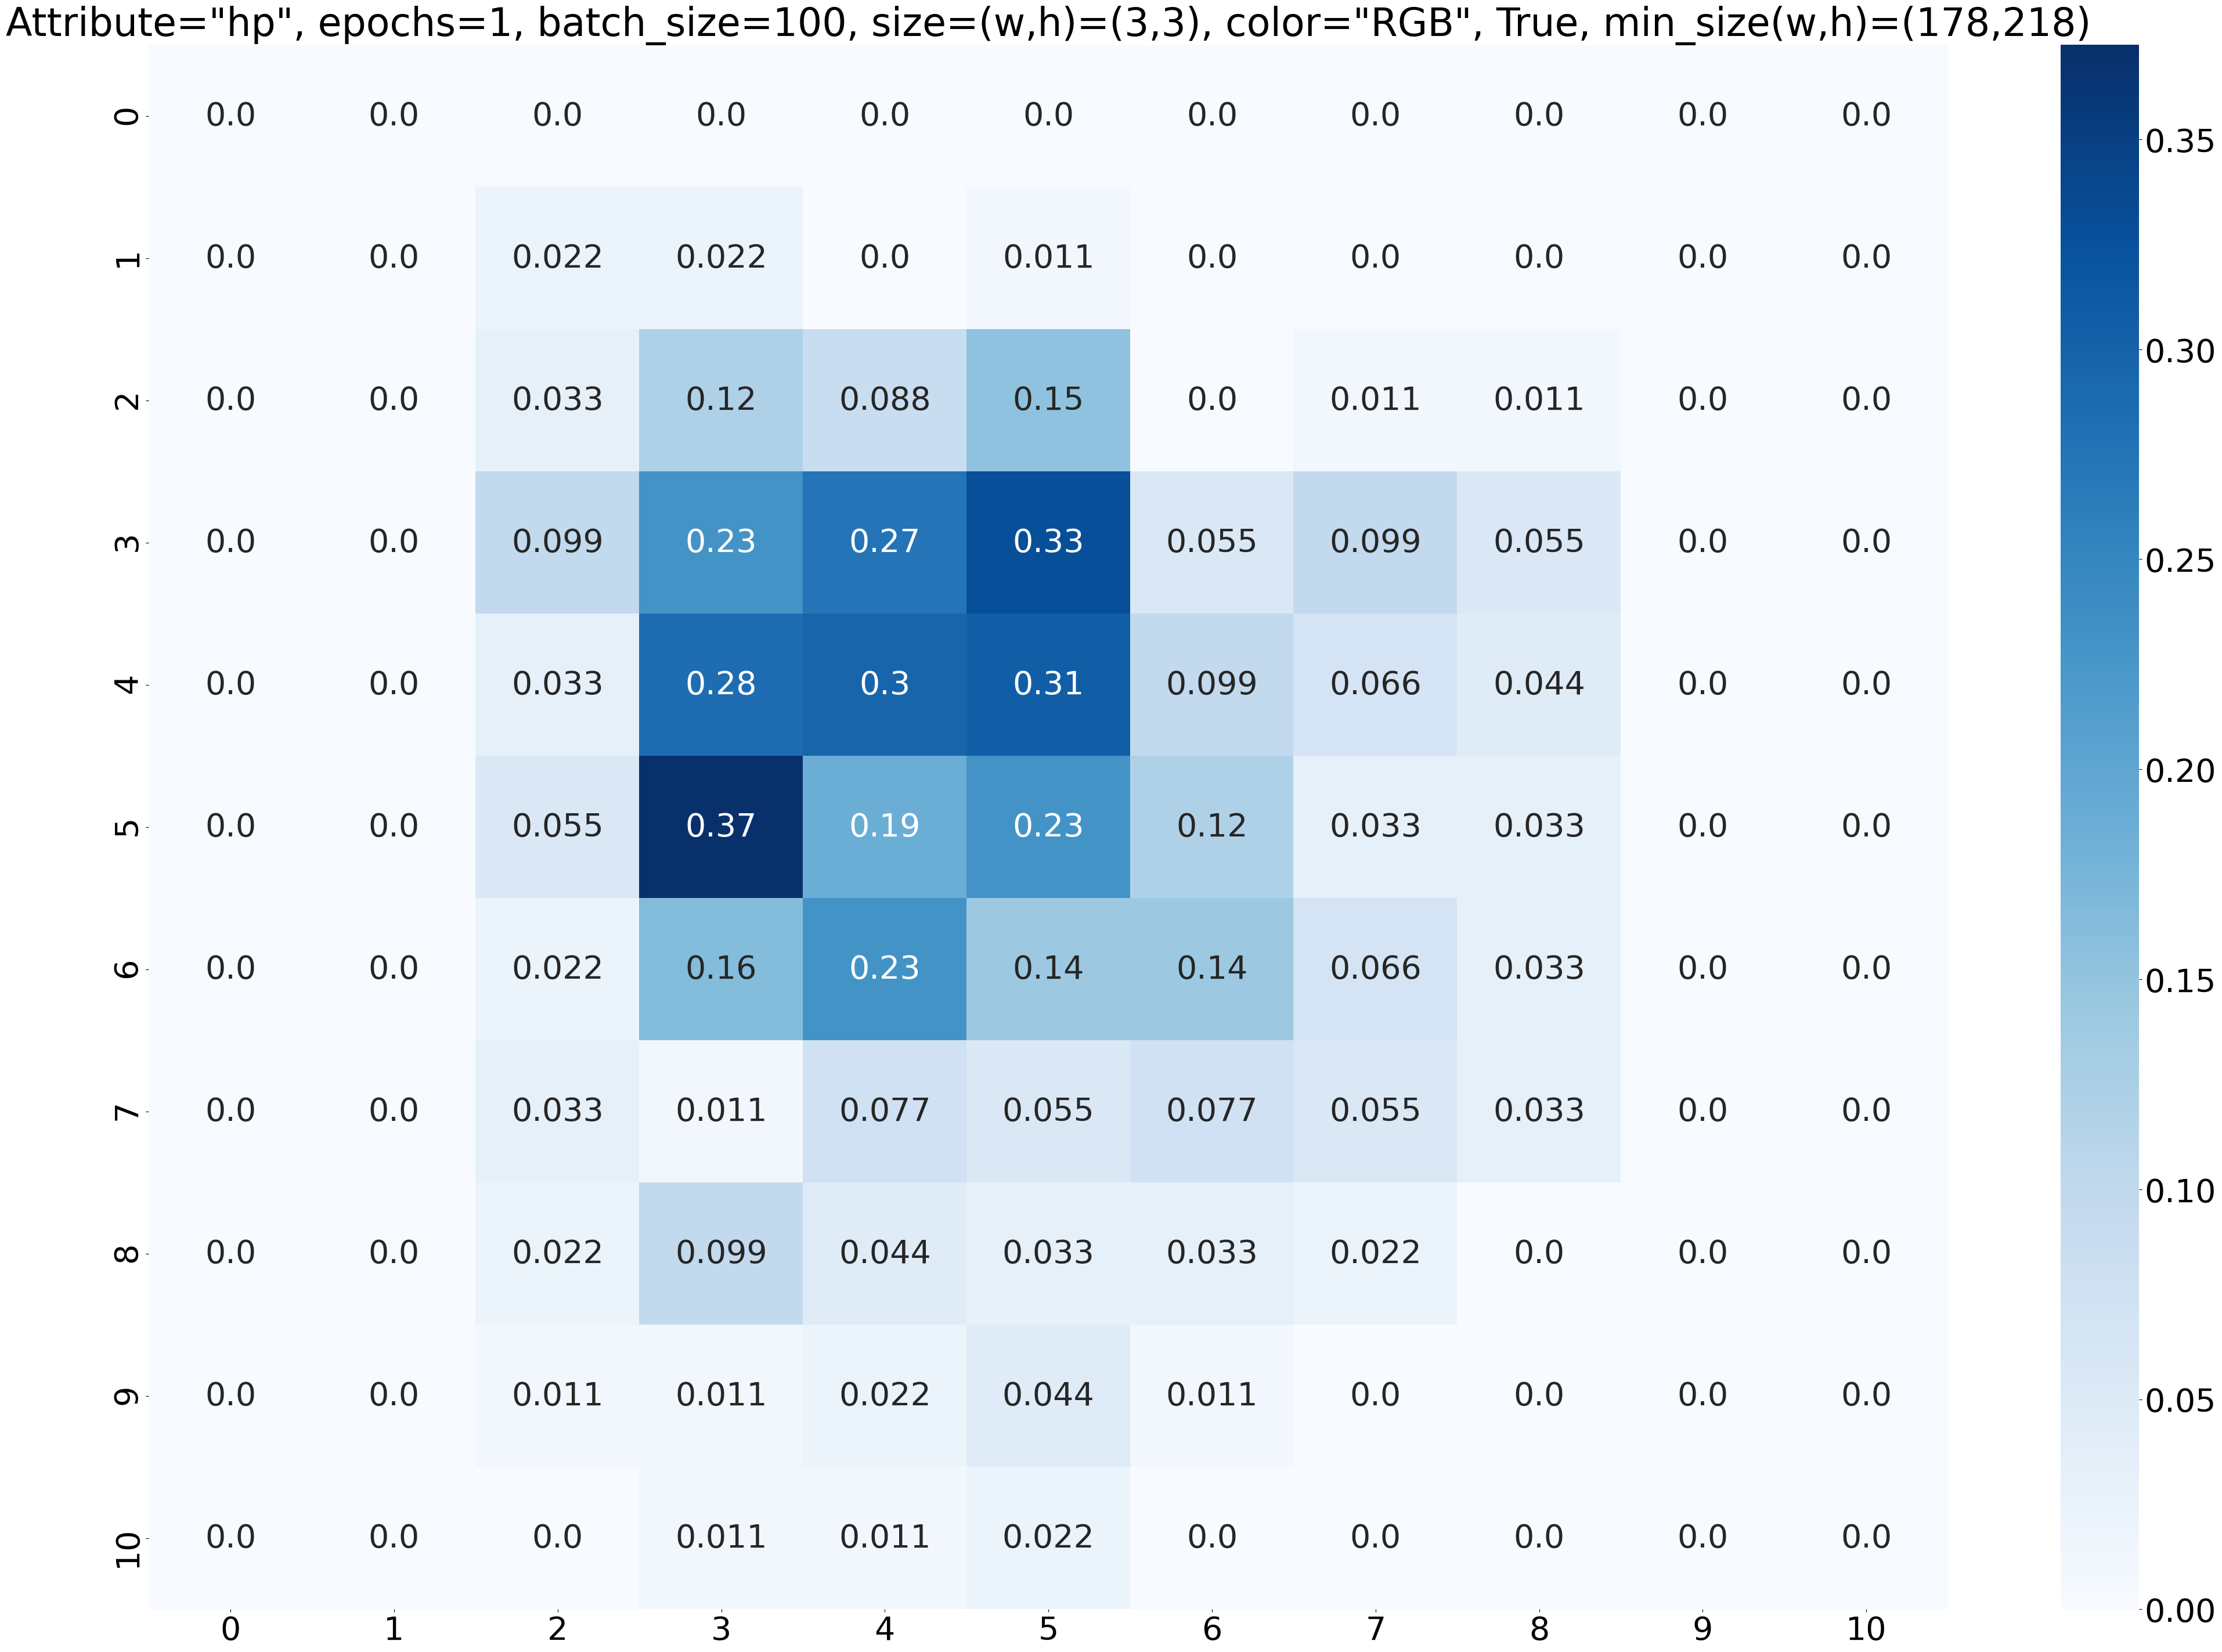

In [175]:
def get_file_path(file_name):
    return os.path.join(config['path']['data']['all_images'], file_name)





from my_py_tools.image.size_manupilation import resize_with_zero_padding, random_crop
# https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/

#
# Warning: All image will be turned into RGB in default.

epochs = config['train']['epoch']
# TODO: batch_size='all'
# batch_size = config['train']['batch_size'] if config['train']['batch_size'] != 'all' else
batch_size = config['train']['batch_size']
input_size = (config['input']['input_size']['width'], config['input']['input_size']['height'])
input_color_format = config['input']['color'] # Image color format
#
use_random_crop = config['train']['random_crop']['use_random_crop']
random_crop_min_size = (config['train']['random_crop']['min_size']['width'],
                        config['train']['random_crop']['min_size']['height'])

clf = RandomForestClassifier(verbose=0, n_jobs=-1, n_estimators=100)

model = clf

#######################################

def my_train():

    pass


#######################################
for attr in config['attributes']:
    print("=== Attribute {} ===\n".format(attr))
    df_liao = df_attrs[attr][df_attrs[attr]['name']=='liao']
    # Drop zero
    df_liao = df_liao[df_liao[attr]!=0]

    # Make X and y (X here only represents image file names.)
    # X = []
    # y = [v for v in df_liao[attr].values]
    # target_w_and_h = (config['input']['input_size']['width'], config['input']['input_size']['height']) #(30, 36)
    # for img_name in df_liao['image'].values:
    #     X.append(resize_with_zero_padding(img=os.path.join(config['path']['data']['all_images'], img_name),
    #                                       input_mode='file_path',
    #                                       target_size=target_w_and_h,
    #                                       return_mode='array'))
    # X = np.array(X)
    # y = np.array(y)
    X = [name for name in df_liao['image'].values]
    y = [v for v in df_liao[attr].values]
    X = np.array(X)
    y = np.array(y)


    # K-fold
    K = config['train']['K_fold_number']
    # TODO: K <= 1
    # folds = []
    # if K > 1:
    #     pass
    # else:
    #     folds.append([0, np.arange()])
    kf = KFold(n_splits=K)
    total_accuracy = 0
    total_confusion_matrices = []
    for i, (train_idx, test_idx) in enumerate(kf.split(X)):
        # TODO K<=1, train_test_split
        # [i, train_idx, test_idx] = fold
        X_train_size = train_idx.size
        iterations = X_train_size // batch_size if X_train_size % batch_size == 0 else X_train_size // batch_size + 1
        print(" ^^^^^^ Fold-{} ^^^^^^ \n".format(i+1))
        print('Epochs: {}'.format(epochs))
        print('Batch size: {}'.format(batch_size))
        print('Total iterations: {}'.format(iterations))
        print('Input size(w,h): ({},{})'.format(input_size[0], input_size[1]))
        print()

        # Get fold
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Get PIL color mode
        pil_color_mode = None
        if input_color_format == 'RGB':
            pil_color_mode = 'RGB'
        elif input_color_format == 'Grayscale':
            pil_color_mode = 'LA'
        else:
            raise ValueError('Invalid input color format.')

        # Get X_test_data
        X_test_data = []
        for x_test_file in X_test:
            X_test_data.append(np.array(resize_with_zero_padding(img=get_file_path(file_name=x_test_file),
                                     input_mode='file_path',
                                     target_size=input_size,
                                     return_mode='PIL_Image').convert(pil_color_mode)).flatten())
        X_test_data = np.array(X_test_data)

        # Epochs
        for cur_epoch_num in range(1, epochs + 1):
            print('Epoch {}'.format(cur_epoch_num))
            accumulated_x = 0
            # Iteration
            for cur_iteration_num in range(1, iterations + 1):
                print('+++++ iteration {}'.format(cur_iteration_num))
                cur_iteration_x_num = min(batch_size, X_train_size - accumulated_x)
                X_batch_data = []
                y_batch_data = []
                for cur_x_number in range(1, cur_iteration_x_num + 1):
                    # Get img
                    idx = accumulated_x + cur_x_number - 1
                    file_path = os.path.join(config['path']['data']['all_images'],
                                             X_train[idx])
                    img = None
                    if use_random_crop == 'true':
                        img = random_crop(img=file_path,
                                          bbox_size=input_size,
                                          input_mode='file_path',
                                          min_size=random_crop_min_size,
                                          all_possible=False,
                                          return_mode='PIL_Image')

                    else:
                        img = resize_with_zero_padding(img=file_path,
                                                                   input_mode='file_path',
                                                                   target_size=input_size,
                                                                   return_mode='PIL_Image')
                    # Image color format
                    img = img.convert(pil_color_mode)
                    # Put batch datas in the current batch
                    X_batch_data.append(np.array(img).flatten())
                    y_batch_data.append(y_train[idx])
                X_batch_data = np.array(X_batch_data)
                y_batch_data = np.array(y_batch_data)
                # Train
                model.fit(X_batch_data, y_batch_data)

            # Validation
            y_pred = model.predict(X_test_data)
            accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
            print("+++++ Epoch accuracy score: {}".format(accuracy))

        # Calculate validation accuracy
        y_pred = model.predict(X_test_data)
        accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
        print("This fold's accuracy score: {}".format(accuracy))
        total_accuracy += accuracy
        total_confusion_matrices.append(confusion_matrix(y_test, y_pred, labels=np.arange(11)))

        # Get image data
        # X_train_flatten = np.array([x.flatten() for x in X_train])
        # X_test_flatten = np.array([x.flatten() for x in X_test])
        # Create classifier
        # clf.fit(np.array([x.flatten() for x in X_train ]), y_train)
        # Accuracy score
        # y_pred_clf = clf.predict(np.array([x.flatten() for x in X_test]))
        # accuracy = accuracy_score(y_test, y_pred_clf)
        # total_accuracy += accuracy
        # print("Fold-{} accuracy score: {:.3f}".format(i + 1, accuracy))
        # total_confusion_matrices.append(confusion_matrix(y_test, y_pred, labels=np.arange(11)))
        # Plot confusion matrix
        # plot_confusion_matrix(clf, X_test_flatten, y_test, cmap=plt.cm.Blues, labels=np.arange(11),
        #                       normalize=('all' if config['confusion_matrix']['normalize'] == 'true' else None))
        print()

    print("Avg accuracy score: {:.3f}\n".format(total_accuracy/K))

    # Add all confusion matrices
    cm_after_added = total_confusion_matrices[0]
    for i in range(1, len(total_confusion_matrices)):
        cm_after_added = np.add(cm_after_added, total_confusion_matrices[i])

    # Determine whether to formalize
    if config['confusion_matrix']['normalize'] == 'true':
        cm_after_added = cm_after_added / (np.linalg.norm(cm_after_added))

    # Plot confusion matrix
    import seaborn as sn
    plt.rcdefaults()
    font={'size':40}
    matplotlib.rc('font', **font)
    plt.figure(figsize=(50,35))
    cm_description = 'Attribute="{}", epochs={}, batch_size={}, size=(w,h)=({},{}), color="{}"'.format(
        attr, epochs, batch_size, input_size[0], input_size[1], input_color_format)
    random_crop_description = 'False' if use_random_crop == False \
        else 'True, min_size(w,h)=({},{})'.format(random_crop_min_size[0], random_crop_min_size[1])
    cm_description = cm_description + ', {}'.format(random_crop_description)
    plt.title(cm_description)
    _ = sn.heatmap(pd.DataFrame(data=cm_after_added,
                            index=list(np.arange(11)),
                            columns=list(np.arange(11))),
                annot=True,
                cmap=plt.cm.Blues,
                fmt='.{}'.format(config['confusion_matrix']['round_precision'])
                )
    plt.savefig('statistics/{}'.format(cm_description))


In [26]:
regr = RandomForestRegressor(random_state=0, verbose=1, n_jobs=-1, n_estimators=100)
# regr.fit(X, y)
regr.fit(np.array([x.flatten() for x in X_train ]), y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.8s finished


RandomForestRegressor(n_jobs=-1, random_state=0, verbose=1)

In [28]:
y_pred = regr.predict(np.array([x.flatten() for x in X_test]))
# print(regr.predict([[0, 0, 0, 0]]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [29]:
# Make float be int (< .5 ; >= .5 )
y_pred2 = np.array([int(y) if (y-float(int(y)) < 0.5) else int(y) + 1 for y in y_pred ])
#%
from sklearn.metrics import r2_score, accuracy_score

# print(r2_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred2))

0.20618556701030927


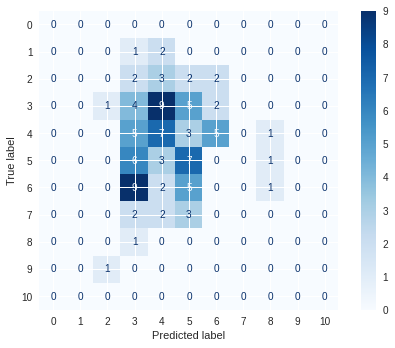

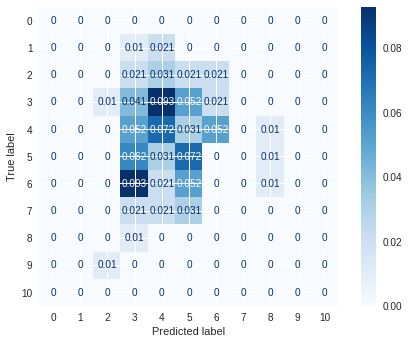

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

clf = RandomForestClassifier(verbose=0, n_jobs=-1, n_estimators=100)

X_train_flatten = np.array([x.flatten() for x in X_train])
X_test_flatten = np.array([x.flatten() for x in X_test])
from sklearn.metrics import plot_confusion_matrix
clf.fit(X_train_flatten, y_train)
for normalize in [None, 'all']:
    plot_confusion_matrix(clf, X_test_flatten, y_test, cmap=plt.cm.Blues, labels=np.arange(11),
                          normalize=normalize)


In [ ]:
y_pred_clf = clf.predict(np.array([x.flatten() for x in X_test]))

print("Accurcy score:",accuracy_score(y_test, y_pred_clf))
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, np.array([x.flatten() for x in X_test]),
                                 y_test,
                                 # display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    # print(title)
    # print(disp.confusion_matrix)

plt.show()


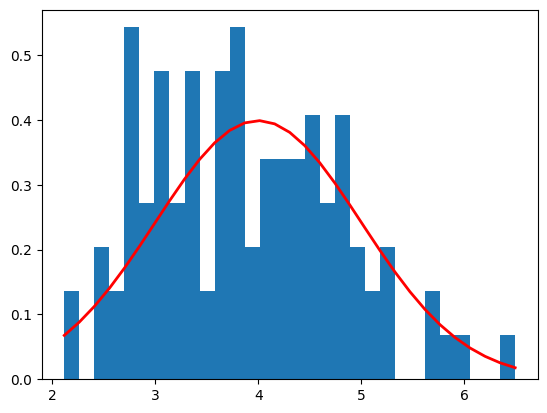

0.2079207920792079


In [70]:
mu, sigma = 4,1
s = np.random.normal(mu, sigma, 101)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()
# a = 1/(sigma * np.sqrt(2 * np.pi)) *   np.exp( - (bins - mu)**2 / (2 * sigma**2) )
# s_y = np.array([ 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ) for ss in s])
sss = np.array([int(ss) if (ss-float(int(ss)) < 0.5) else int(ss) + 1 for ss in s])
y_pred_normal = sss.copy()
print(accuracy_score(y_test, y_pred_normal))

In [81]:
rand_numbers = []
for i in range(101):
    rand_numbers.append(randint(3,6))
rand_numbers = np.array(rand_numbers)
print(accuracy_score(y_test, rand_numbers))

0.21782178217821782


In [15]:
iii = Image.open('data/images/100116.jpg')
iii.show()
print(iii.size)

(178, 218)


In [3]:
from my_py_tools.image.size_manupilation import resize_with_zero_padding

In [4]:
kkk = resize_with_zero_padding(img='data/images/100116.jpg', input_mode='file_path', target_width=300, target_height=360, return_mode='PIL_Image')
kkk.show()

In [4]:
from my_py_tools.image.size_manupilation import random_crop
for i in range(10):
    random_crop(img='data/images/100116.jpg', bbox_size=(300,300),
            input_mode='file_path', min_size=(1000,500), all_possible=False,
            return_mode='PIL_Image'
            ).show()


In [17]:
# regr = RandomForestRegressor(random_state=0, verbose=1, n_jobs=-1)
# # regr.fit(X, y)
# regr.fit(np.array([x.flatten() for x in X ]), y)
# # RandomForestRegressor(...)
# # print(regr.predict([[0, 0, 0, 0]]))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished


RandomForestRegressor(n_jobs=-1, random_state=0, verbose=1)

In [18]:
iii = Image.open('data/images/184682.jpg')
iii.show()
np.array(iii).shape

(218, 178, 3)

In [19]:
# Flatten
aaaaa = X[0]
bbbbb = aaaaa.flatten()

Important: I convert all images into jpg when resizing

In [20]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression
# X, y = make_regression(n_features=1, n_informative=2,
#                        random_state=0, shuffle=False)

# regr = RandomForestRegressor(max_depth=2, random_state=0)
# regr.fit(X, y)
# RandomForestRegressor(...)
# print(regr.predict([[0, 0, 0, 0]]))


In [396]:
img = Image.open('/home/smallfish/Pictures/22222.png')
a = np.array(img)
print(a.shape)
print(img.mode)

(1033, 1060, 4)
RGBA
